In [1]:
# ====================================
# ETAPA 1: UPLOAD DOS DADOS
# ====================================
from google.colab import files
uploaded = files.upload()

import pandas as pd

nfe_df = pd.read_csv("base_simulada_nfe.csv")
nfce_df = pd.read_csv("base_simulada_nfce.csv")

print("NFe:")
display(nfe_df.head())

print("NFCe:")
display(nfce_df.head())



Saving base_simulada_nfce.csv to base_simulada_nfce.csv
Saving base_simulada_nfe.csv to base_simulada_nfe.csv
NFe:


,CNPJ Emitente,CNPJ Destinatário,CFOP,NCM,CNAE,Valor Total,ICMS,INDAUTORIZADO,DHEMI,DTSAIDA
0,49808276976407,58940550786532,1102,27101932,1921700,290467.69,8886.11,0,2021-01-01,2021-01-02
1,38933954896263,14367814975165,1403,27101932,4731300,38291.68,8629.86,0,2021-01-02,2021-01-03
2,80643689242456,26938300300675,1102,27101259,1921700,51984.38,36299.32,1,2021-01-03,2021-01-04
3,21219446258561,72285672699153,1501,27101230,4681900,499451.84,17209.32,1,2021-01-04,2021-01-05
4,60050147002933,14367814975165,1501,27101241,4731300,166686.43,25069.78,0,2021-01-05,2021-01-06


NFCe:


,CNPJ Emitente,XNOME,IE,DHEMI,NNF,NCM,VProd,QTRIB,VICMS,INDPAG
0,18707159231111,Posto 0,57818749,2021-01-01,35135,27101259,63028.13,41071.99,50360.83,PIX
1,20542722395709,Posto 1,81787884,2021-01-02,38164,27101921,182475.15,28824.21,39096.49,PIX
2,44312628217308,Posto 2,45346795,2021-01-03,84489,27101251,38237.08,3056.55,71197.10,Dinheiro
3,70299905983268,Posto 3,94525002,2021-01-04,48562,27101921,360398.54,9661.09,67626.98,Cartão
4,46221114558457,Posto 4,56003901,2021-01-05,79110,27101932,57596.57,43384.70,23755.61,PIX


In [2]:
# ====================================
# ETAPA 2: PRÉ-PROCESSAMENTO
# ====================================
from sklearn.preprocessing import MinMaxScaler

# NFe: selecionar e normalizar colunas numéricas
nfe_features = ['Valor Total', 'ICMS']
scaler_nfe = MinMaxScaler()
X_nfe = scaler_nfe.fit_transform(nfe_df[nfe_features])

# NFCe: selecionar e normalizar colunas numéricas
nfce_features = ['VProd', 'QTRIB', 'VICMS']
scaler_nfce = MinMaxScaler()
X_nfce = scaler_nfce.fit_transform(nfce_df[nfce_features])


In [3]:
# ====================================
# ETAPA 3: CONSTRUÇÃO DOS AUTOENCODERS
# ====================================
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

def build_autoencoder(input_dim):
    model = keras.Sequential([
        layers.Input(shape=(input_dim,)),
        layers.Dense(8, activation='relu'),
        layers.Dense(4, activation='relu'),
        layers.Dense(8, activation='relu'),
        layers.Dense(input_dim, activation='linear')
    ])
    model.compile(optimizer='adam', loss='mse')
    return model

model_nfe = build_autoencoder(X_nfe.shape[1])
model_nfce = build_autoencoder(X_nfce.shape[1])



In [4]:
# ====================================
# ETAPA 4: TREINAMENTO DOS MODELOS
# ====================================
history_nfe = model_nfe.fit(
    X_nfe, X_nfe,
    epochs=30,
    batch_size=32,
    validation_split=0.1,
    verbose=1
)

history_nfce = model_nfce.fit(
    X_nfce, X_nfce,
    epochs=30,
    batch_size=32,
    validation_split=0.1,
    verbose=1
)



Epoch 1/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.2557 - val_loss: 0.2004
Epoch 2/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1766 - val_loss: 0.1248
Epoch 3/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1088 - val_loss: 0.0839
Epoch 4/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0741 - val_loss: 0.0692
Epoch 5/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0619 - val_loss: 0.0624
Epoch 6/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0581 - val_loss: 0.0584
Epoch 7/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0528 - val_loss: 0.0558
Epoch 8/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0521 - val_loss: 0.0542
Epoch 9/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0493 - val_loss: 0.0530
Epoch 10/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0502 - val_loss: 0.0520
Epoch 11/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0490 - val_loss: 0.0513
Epoch 12/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0479 - val_lo

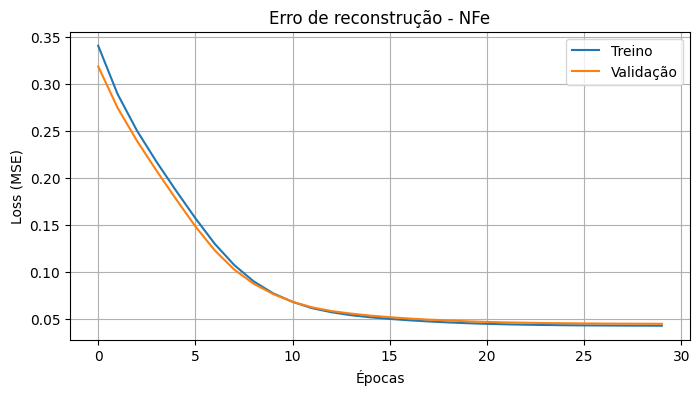

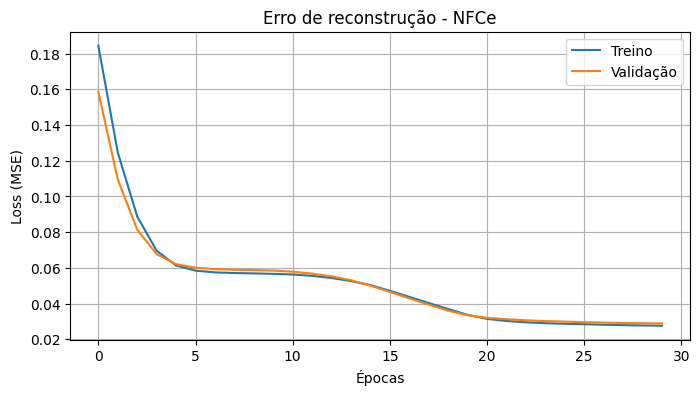

In [ ]:
# ====================================
# ETAPA 5: GRÁFICOS DA CURVA DE PERDA
# ====================================
import matplotlib.pyplot as plt

def plot_history(history, title):
    plt.figure(figsize=(8, 4))
    plt.plot(history.history['loss'], label='Treino')
    plt.plot(history.history['val_loss'], label='Validação')
    plt.title(f'Erro de reconstrução - {title}')
    plt.xlabel('Épocas')
    plt.ylabel('Loss (MSE)')
    plt.legend()
    plt.grid(True)
    plt.show()

plot_history(history_nfe, "NFe")
plot_history(history_nfce, "NFCe")


In [5]:
# ====================================
# ETAPA 6: DETECÇÃO DE ANOMALIAS
# ====================================
import numpy as np

def avaliar_anomalias(model, X, df, prefixo):
    reconstructions = model.predict(X)
    mse = np.mean(np.square(X - reconstructions), axis=1)
    threshold = np.percentile(mse, 95)
    df[f'{prefixo}_Erro_Reconstrucao'] = mse
    df[f'{prefixo}_Anomalia'] = (mse > threshold).astype(int)
    print(f"Threshold para {prefixo}: {threshold:.6f}")
    return df

nfe_df = avaliar_anomalias(model_nfe, X_nfe, nfe_df, 'NFe')
nfce_df = avaliar_anomalias(model_nfce, X_nfce, nfce_df, 'NFCe')


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Threshold para NFe: 0.157218
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Threshold para NFCe: 0.002360


In [7]:
# ====================================
# ETAPA 7: EXIBIR POSSÍVEIS FRAUDES (COMPLETAS)
# ====================================
import numpy as np

# Função para gerar justificativas com base no erro de reconstrução
def gerar_justificativas(model, X, df, prefixo, feature_names):
    reconstructions = model.predict(X)
    diffs = np.abs(X - reconstructions)
    justificativas = []

    for i in range(len(X)):
        if df[f"{prefixo}_Anomalia"].iloc[i] == 1:
            idx_maior_dif = np.argmax(diffs[i])
            variavel = feature_names[idx_maior_dif]
            valor_real = X[i][idx_maior_dif]
            valor_reconstruido = reconstructions[i][idx_maior_dif]
            percentual = (valor_real - valor_reconstruido) / (valor_real + 1e-5)
            direcao = "acima" if percentual > 0 else "abaixo"
            justificativa = f"{variavel} reconstruído {abs(percentual * 100):.1f}% {direcao} do valor original"
        else:
            justificativa = ""
        justificativas.append(justificativa)

    df[f"{prefixo}_Justificativa_Anomalia"] = justificativas
    return df

# Gerar justificativas para ambos os datasets
nfe_df = gerar_justificativas(model_nfe, X_nfe, nfe_df, 'NFe', ['Valor Total', 'ICMS'])
nfce_df = gerar_justificativas(model_nfce, X_nfce, nfce_df, 'NFCe', ['VProd', 'QTRIB', 'VICMS'])

# Exibir anomalias NFe com todos os dados + justificativa
print("Top 10 Anomalias NFe (com dados completos e justificativa):")
display(
    nfe_df[nfe_df['NFe_Anomalia'] == 1]
    .sort_values(by='NFe_Erro_Reconstrucao', ascending=False)
    .head(10)
)

# Exibir anomalias NFCe com todos os dados + justificativa
print("Top 10 Anomalias NFCe (com dados completos e justificativa):")
display(
    nfce_df[nfce_df['NFCe_Anomalia'] == 1]
    .sort_values(by='NFCe_Erro_Reconstrucao', ascending=False)
    .head(10)
)


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Top 10 Anomalias NFe (com dados completos e justificativa):


,CNPJ Emitente,CNPJ Destinatário,CFOP,NCM,CNAE,Valor Total,ICMS,INDAUTORIZADO,DHEMI,DTSAIDA,NFe_Erro_Reconstrucao,NFe_Anomalia,NFe_Justificativa_Anomalia
290,26710344680070,21219446258561,1501,27101999,1921700,14481.97,68304.52,0,2021-10-18,2021-10-19,0.224004,1,ICMS reconstruído 51.3% acima do valor original
525,18707159231111,46813350101484,1501,27101259,4731300,495214.49,3472.41,0,2022-06-10,2022-06-11,0.221592,1,ICMS reconstruído 1013.6% abaixo do valor orig...
326,70299905983268,78821056528514,1501,27101921,4731300,464672.13,15.89,0,2021-11-23,2021-11-24,0.220454,1,ICMS reconstruído 5084934.2% abaixo do valor o...
902,65795242760593,37576342103200,1202,27101932,4681900,470086.45,735.93,0,2023-06-22,2023-06-23,0.219863,1,ICMS reconstruído 4907.8% abaixo do valor orig...
344,75563085556768,62338322241752,1501,27101230,4731300,32524.73,69603.12,1,2021-12-11,2021-12-12,0.217826,1,ICMS reconstruído 50.2% acima do valor original
857,46634094027630,93569004708861,1202,27101259,1921700,498885.95,4812.77,0,2023-05-08,2023-05-09,0.214993,1,ICMS reconstruído 719.7% abaixo do valor original
318,70072806379938,60050147002933,1501,27101251,1921700,44075.00,69701.41,0,2021-11-15,2021-11-16,0.208723,1,ICMS reconstruído 49.5% acima do valor original
546,58804326992743,44387326667272,1403,22071010,4731300,13213.28,65869.46,0,2022-07-01,2022-07-02,0.207524,1,ICMS reconstruído 51.1% acima do valor original
442,62338322241752,89225676558124,1501,27101241,4731300,21166.24,66754.28,0,2022-03-19,2022-03-20,0.207082,1,ICMS reconstruído 50.6% acima do valor original
988,18707159231111,89225676558124,1202,27101932,4731300,29103.95,67687.80,0,2023-09-16,2023-09-17,0.207014,1,ICMS reconstruído 50.2% acima do valor original


Top 10 Anomalias NFCe (com dados completos e justificativa):


,CNPJ Emitente,XNOME,IE,DHEMI,NNF,NCM,VProd,QTRIB,VICMS,INDPAG,NFCe_Erro_Reconstrucao,NFCe_Anomalia,NFCe_Justificativa_Anomalia
2,44312628217308,Posto 2,45346795,2021-01-03,84489,27101251,38237.08,3056.55,71197.10,Dinheiro,0.018497,1,QTRIB reconstruído 361.4% abaixo do valor orig...
942,55646664180312,Posto 942,79261123,2023-08-01,17410,27101259,10770.93,42281.42,453.04,PIX,0.017783,1,VICMS reconstruído 5078.5% abaixo do valor ori...
714,36564007480347,Posto 714,57793791,2022-12-16,49051,27101932,12252.47,6626.62,70211.11,Cartão,0.015756,1,VProd reconstruído 1460.7% abaixo do valor ori...
871,72454799043664,Posto 871,88859551,2023-05-22,74230,27101921,34848.59,3166.33,65244.18,Dinheiro,0.014118,1,QTRIB reconstruído 290.1% abaixo do valor orig...
7,26710344680070,Posto 7,37668708,2021-01-08,31604,22071010,41229.48,4548.69,65821.11,Cartão,0.011458,1,VProd reconstruído 186.4% abaixo do valor orig...
355,18707159231111,Posto 355,62987688,2021-12-22,23833,27101259,7147.56,46792.31,5951.81,Cartão,0.011061,1,VICMS reconstruído 231.9% abaixo do valor orig...
443,37576342103200,Posto 443,86340125,2022-03-20,12881,27101999,10030.62,48976.07,73976.72,Dinheiro,0.010754,1,VICMS reconstruído 13.7% acima do valor original
854,20542722395709,Posto 854,10759848,2023-05-05,39714,27101230,167011.42,2668.18,79219.03,Cartão,0.010375,1,QTRIB reconstruído 455.7% abaixo do valor orig...
430,39521241904683,Posto 430,89457242,2022-03-07,60812,27101932,98234.30,3144.53,69658.10,Cartão,0.009922,1,QTRIB reconstruído 301.0% abaixo do valor orig...
201,72454799043664,Posto 201,49726488,2021-07-21,32923,22071010,19427.04,48180.25,75020.24,Cartão,0.009602,1,QTRIB reconstruído 12.4% acima do valor original


In [9]:
# ====================================
# ETAPA 8: RANKING DE ANOMALIAS POR CNPJ E ANO (NFe e NFCe)
# ====================================

# Garantir que 'DHEMI' esteja como datetime
nfe_df['Ano'] = pd.to_datetime(nfe_df['DHEMI']).dt.year
nfce_df['Ano'] = pd.to_datetime(nfce_df['DHEMI']).dt.year

# Filtrar apenas notas anômalas
anomalias_nfe = nfe_df[nfe_df['NFe_Anomalia'] == 1]
anomalias_nfce = nfce_df[nfce_df['NFCe_Anomalia'] == 1]

# Agrupar NFe
ranking_nfe = (
    anomalias_nfe
    .groupby(['CNPJ Emitente', 'Ano'])
    .agg({
        'Valor Total': 'sum',
        'NFe_Anomalia': 'count'
    })
    .rename(columns={
        'Valor Total': 'Valor Total Anômalo',
        'NFe_Anomalia': 'Qtd Notas Anômalas'
    })
    .reset_index()
    .sort_values(by='Valor Total Anômalo', ascending=False)
)

# Agrupar NFCe
ranking_nfce = (
    anomalias_nfce
    .groupby(['CNPJ Emitente', 'Ano'])
    .agg({
        'VProd': 'sum',
        'NFCe_Anomalia': 'count'
    })
    .rename(columns={
        'VProd': 'Valor Total Anômalo',
        'NFCe_Anomalia': 'Qtd Notas Anômalas'
    })
    .reset_index()
    .sort_values(by='Valor Total Anômalo', ascending=False)
)

# Exibir
print("Ranking de Anomalias - NFe:")
display(ranking_nfe.head(10))

print("Ranking de Anomalias - NFCe:")
display(ranking_nfce.head(10))


Ranking de Anomalias - NFe:


,CNPJ Emitente,Ano,Valor Total Anômalo,Qtd Notas Anômalas
29,62338322241752,2023,593489.66,2
24,55646664180312,2021,499781.06,1
20,46634094027630,2023,498885.95,1
21,46813350101484,2021,498826.01,1
4,18707159231111,2022,495214.49,1
13,37576342103200,2021,487794.85,1
31,67628014464771,2021,484197.81,1
22,46813350101484,2023,477510.13,1
30,65795242760593,2023,470086.45,1
38,72454799043664,2022,469466.29,1


Ranking de Anomalias - NFCe:


,CNPJ Emitente,Ano,Valor Total Anômalo,Qtd Notas Anômalas
1,10812137970621,2023,553926.75,1
33,65795242760593,2023,304367.22,1
30,61387552181268,2023,250384.96,2
25,57313428307289,2023,222784.57,1
9,36564007480347,2022,197992.21,2
26,58804326992743,2021,171580.94,1
7,20542722395709,2023,167011.42,1
31,62338322241752,2021,153018.64,1
14,39521241904683,2022,149135.70,3
35,72285672699153,2021,134327.33,2


In [10]:
# ====================================
# ETAPA 9: SALVAR MODELOS
# ====================================
model_nfe.save("autoencoder_nfe_model.h5")
model_nfce.save("autoencoder_nfce_model.h5")
print("Modelos salvos com sucesso!")


Modelos salvos com sucesso!
